In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")

Total number of plots: 27


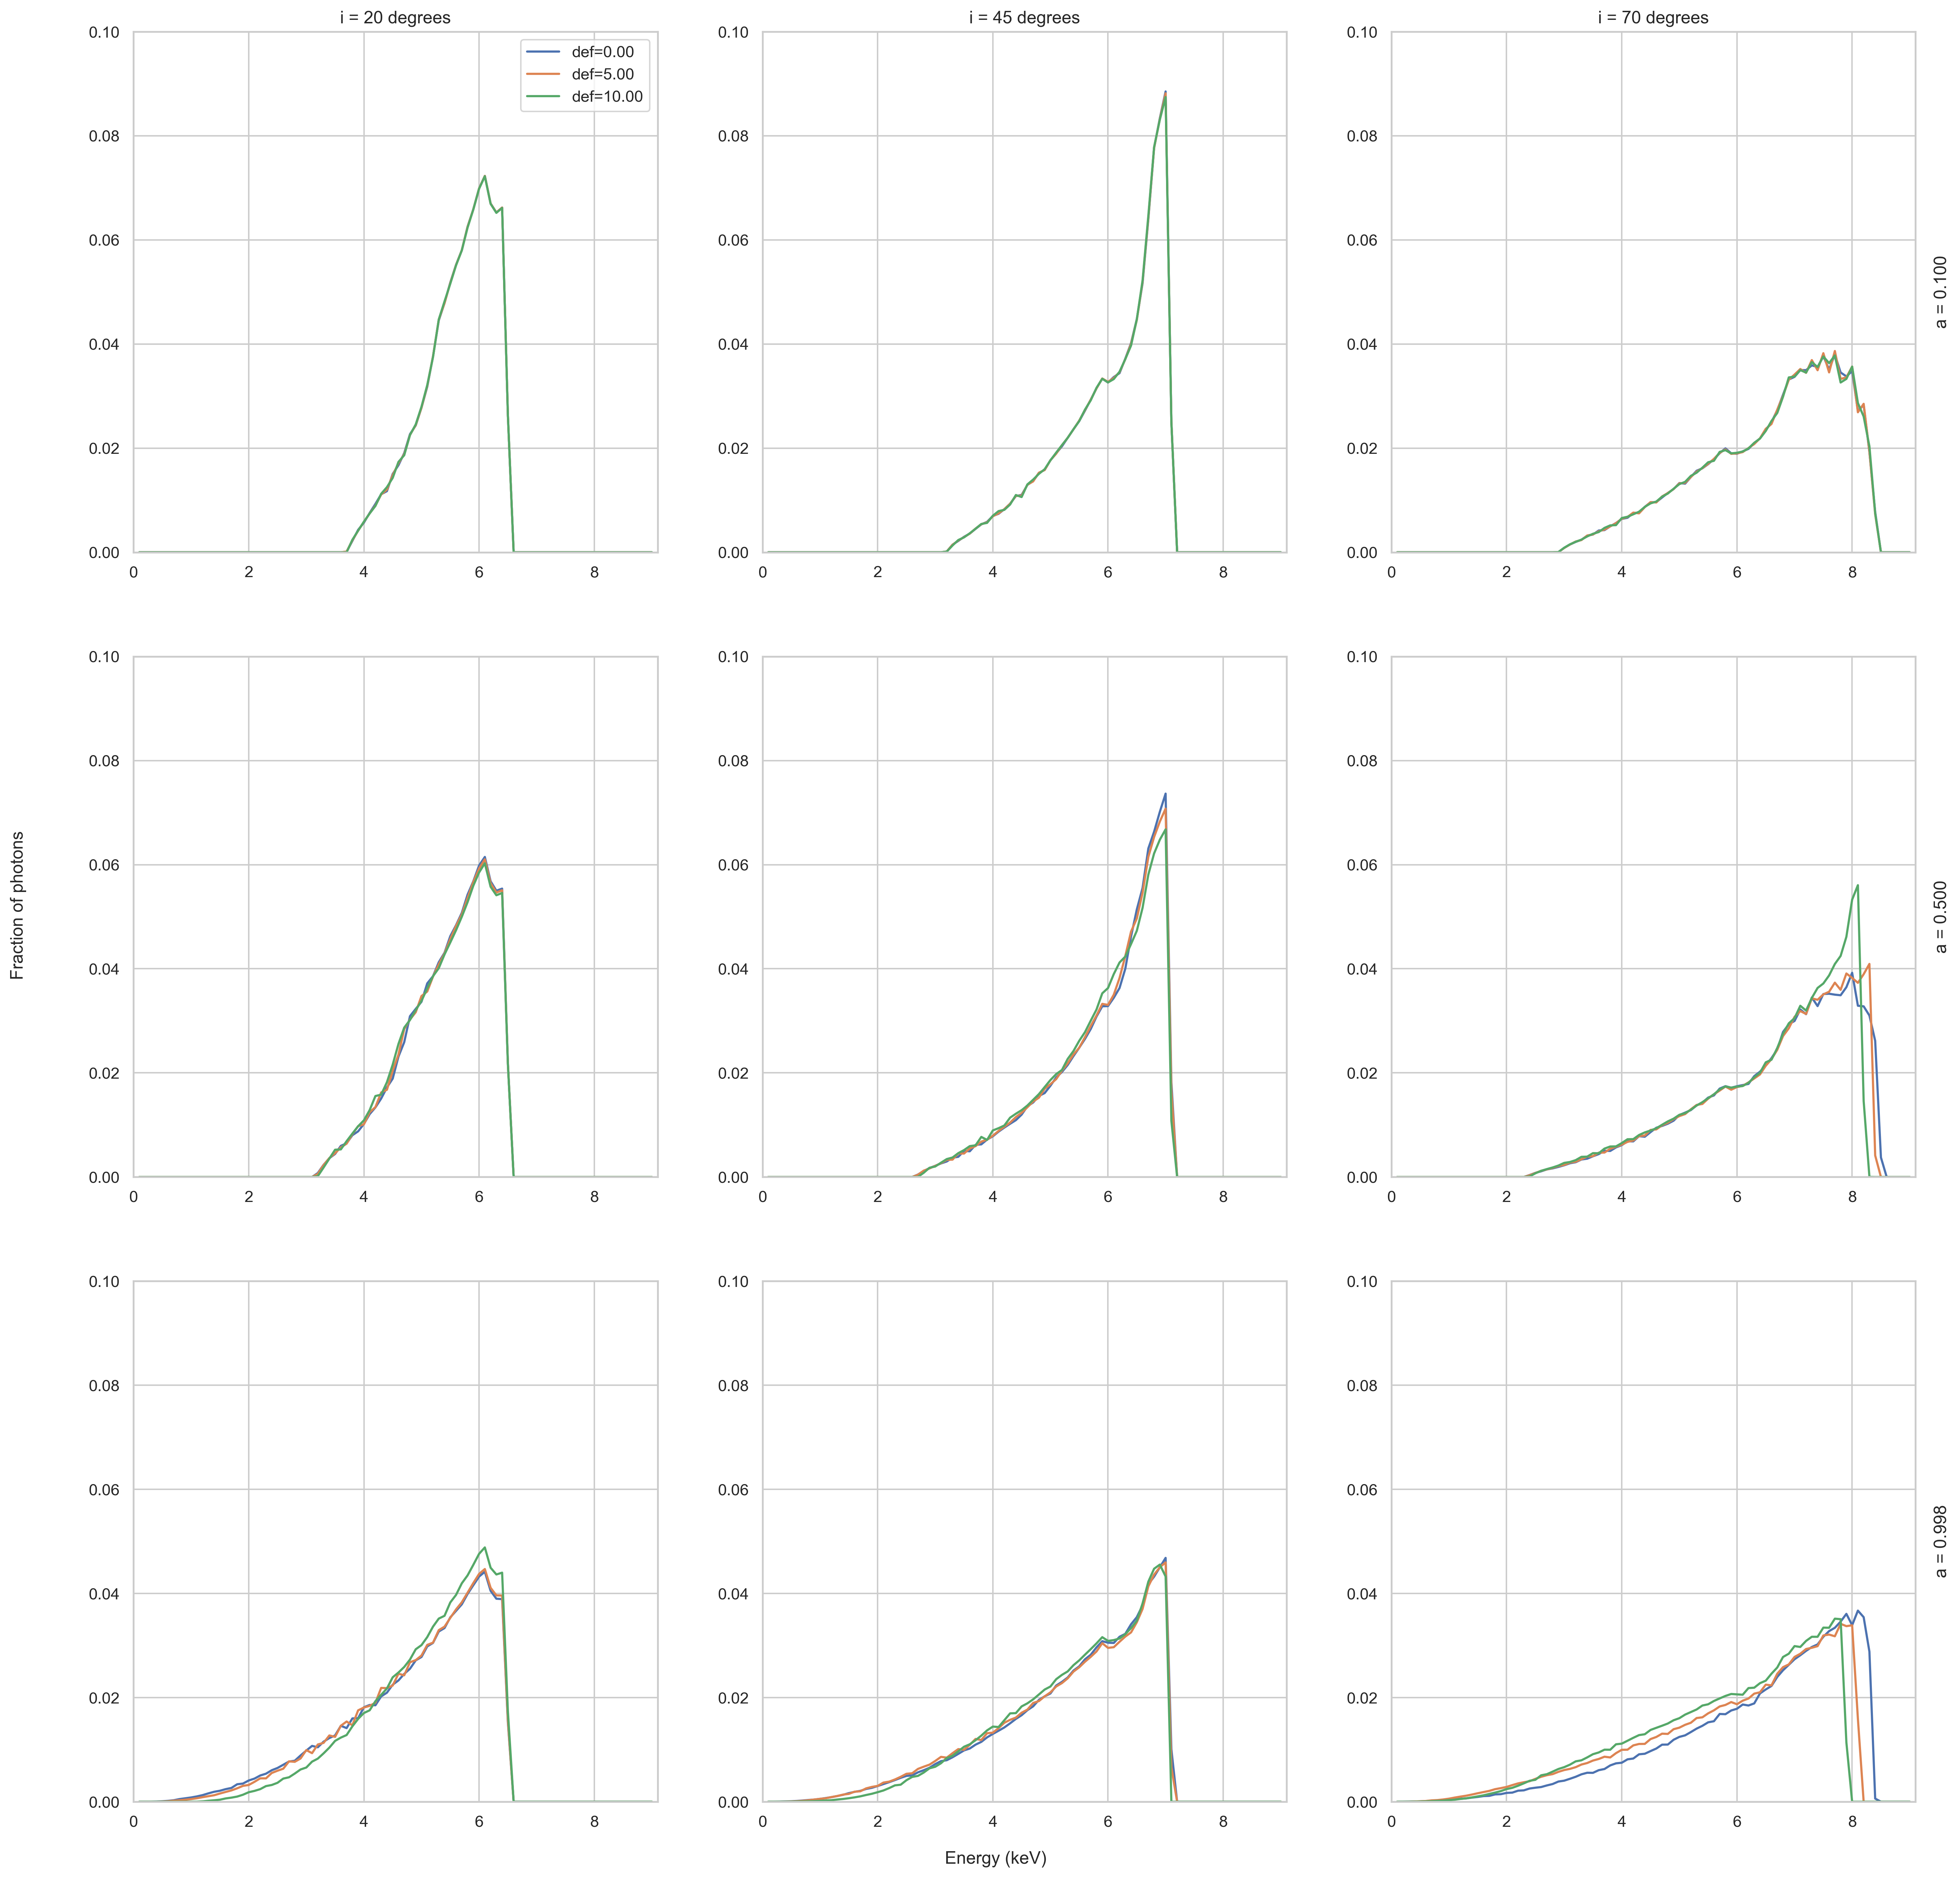

In [15]:
data_ori = pd.read_csv(r'C:\Users\WalkerXin\Downloads\compare\iron_a0.500.epsilon_r0.00.epsilon_t0.00.i45.00.dat', sep=' ', header=None)

file_dir = r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data'
os.chdir(file_dir)
filename_format = "iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"

spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]
counter = 0

# Generate 3x3 subplots, each subplot with different spin and inclination.
# Each subplot contains 3 lines, each line with different defpar.
# Every subplot has the same x and y scale.
plt.figure(figsize=(22, 22), dpi=300)

for i in range(3):
    for j in range(3):
        plt.subplot(3,3,3*i+j+1)
        for k in range(3):
            filename = filename_format.format(spin_list[i], defpar_list[k], inc_list[j])
            try:
                data = pd.read_csv(filename, sep=' ', header=None)
                plt.plot(data.iloc[:,0], data.iloc[:,1], label='def={:.2f}'.format(defpar_list[k]))
                counter += 1
            except:
                continue
        
        # Show legend (deformation) for the first subplot only
        if i == 0 and j == 0:
            plt.legend()

        # Show title (inclination) for first row only
        if i == 0:
            plt.title('i = {:.0f} degrees'.format(inc_list[j]))

        # Show y label (spin) for last column only, put to the right of the subplot
        if j == 2:
            plt.text(1.05, 0.5, 'a = {:.3f}'.format(spin_list[i]), ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)

        # Adjust the x and y scale
        plt.xlim(0, 9.1)
        plt.ylim(0, 0.1)

# Define the common x and y labels
fig = plt.gcf()
fig.text(0.5, 0.085, 'Energy (keV)', ha='center', va='center')
fig.text(0.075, 0.5, 'Fraction of photons', ha='center', va='center', rotation='vertical')

print('Total number of plots: {}'.format(counter))
plt.show()